In [1]:
import numpy as np
import sklearn
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[10,5])
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
#from time import clock
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from collections import defaultdict, Counter
# from helpers import cluster_acc, myGMM,nn_arch,nn_reg
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import sys
from sklearn.metrics import accuracy_score, homogeneity_score

In [2]:
credit = pd.read_csv('crx.data', names=['Male','Age','Debt','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Income','Approved'],
                  usecols=[0,1,2,7,8,9,10,11,14,15])

credit=credit.replace('t',1)
credit=credit.replace('f',0)
credit=credit.replace('+',1)
credit=credit.replace('-',0)
credit=credit.replace('b',1)
credit=credit.replace('a',0)
credit=credit.replace('?', np.nan)

credit=credit[credit.isnull().any(axis=1)==False]

credit['Age']=credit['Age'].astype('float64')
credit['Income']=credit['Income'].astype('int64')

In [3]:
credit

,Male,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income,Approved
0,1.0,30.83,0.000,1.25,1,1,1,0,0,1
1,0.0,58.67,4.460,3.04,1,1,6,0,560,1
2,0.0,24.50,0.500,1.50,1,0,0,0,824,1
3,1.0,27.83,1.540,3.75,1,1,5,1,3,1
4,1.0,20.17,5.625,1.71,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
685,1.0,21.08,10.085,1.25,0,0,0,0,0,0
686,0.0,22.67,0.750,2.00,0,1,2,1,394,0
687,0.0,25.25,13.500,2.00,0,1,1,1,1,0
688,1.0,17.92,0.205,0.04,0,0,0,0,750,0


In [4]:
credit.to_csv('credit_a3.csv',index=False)

In [5]:
X = credit.loc[:, credit.columns != 'Approved']
y = credit.loc[:, credit.columns == 'Approved']

In [6]:
X

,Male,Age,Debt,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Income
0,1.0,30.83,0.000,1.25,1,1,1,0,0
1,0.0,58.67,4.460,3.04,1,1,6,0,560
2,0.0,24.50,0.500,1.50,1,0,0,0,824
3,1.0,27.83,1.540,3.75,1,1,5,1,3
4,1.0,20.17,5.625,1.71,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
685,1.0,21.08,10.085,1.25,0,0,0,0,0
686,0.0,22.67,0.750,2.00,0,1,2,1,394
687,0.0,25.25,13.500,2.00,0,1,1,1,1
688,1.0,17.92,0.205,0.04,0,0,0,0,750


In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)

In [8]:
X

array([[1.00000000e+00, 2.56842105e-01, 0.00000000e+00, ...,
        1.49253731e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.75488722e-01, 1.59285714e-01, ...,
        8.95522388e-02, 0.00000000e+00, 5.60000000e-03],
       [0.00000000e+00, 1.61654135e-01, 1.78571429e-02, ...,
        0.00000000e+00, 0.00000000e+00, 8.24000000e-03],
       ...,
       [0.00000000e+00, 1.72932331e-01, 4.82142857e-01, ...,
        1.49253731e-02, 1.00000000e+00, 1.00000000e-05],
       [1.00000000e+00, 6.27067669e-02, 7.32142857e-03, ...,
        0.00000000e+00, 0.00000000e+00, 7.50000000e-03],
       [1.00000000e+00, 3.19548872e-01, 1.20535714e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [9]:
y

,Approved
0,1
1,1
2,1
3,1
4,1
...,...
685,0
686,0
687,0
688,0


### K-Means

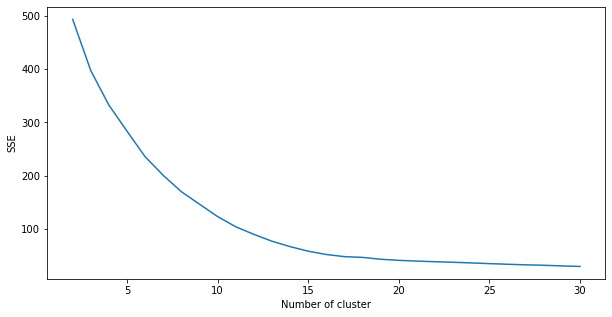

In [10]:
sse = {}
for cluster in list(range(2,31)):
    kmeans = KMeans(n_clusters=cluster, max_iter=1000, random_state=44).fit(X)
    sse[cluster] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=44).fit(X)
accuracy_score((1-kmeans.labels_), y)

0.14264264264264265

In [12]:
kmeans = KMeans(n_clusters=2, n_init=50, max_iter=1000, random_state=44).fit(X)
adjusted_mutual_info_score((1-kmeans.labels_), y.values.reshape(666,))

0.4328238501782745

For n_clusters=2, The Silhouette Coefficient is 0.2960722269244721
For n_clusters=2, The homogeneity_score is 0.43423982721363547
For n_clusters=3, The Silhouette Coefficient is 0.3042633912189627
For n_clusters=3, The homogeneity_score is 0.3403594727006004
For n_clusters=4, The Silhouette Coefficient is 0.343136018705857
For n_clusters=4, The homogeneity_score is 0.43569954677695977
For n_clusters=5, The Silhouette Coefficient is 0.375510838648283
For n_clusters=5, The homogeneity_score is 0.3648009616441264
For n_clusters=6, The Silhouette Coefficient is 0.4101360679647468
For n_clusters=6, The homogeneity_score is 0.4447044731699588
For n_clusters=7, The Silhouette Coefficient is 0.4335055135112571
For n_clusters=7, The homogeneity_score is 0.2905475870887128
For n_clusters=8, The Silhouette Coefficient is 0.4803811585565731
For n_clusters=8, The homogeneity_score is 0.4087017097631725
For n_clusters=9, The Silhouette Coefficient is 0.5164061288364039
For n_clusters=9, The homogene

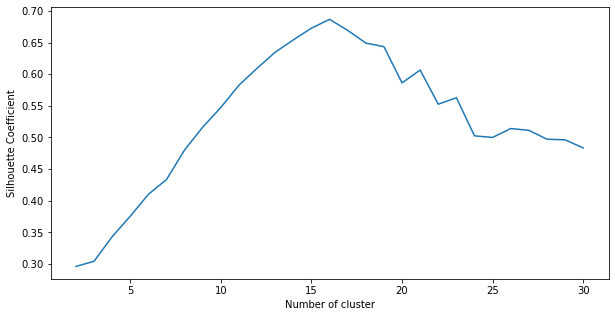

In [14]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silh = {}
homog = {}
for cluster in range(2, 31):
    kmeans = KMeans(n_clusters=cluster, n_init=50, max_iter=1000, random_state=44).fit(X)
    label = kmeans.labels_
    #print(label)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y.values.reshape(666,), label)
    silh[cluster] = sil_coeff
    homog[cluster] = homog_score
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0, 0.5, 'Silhouette Coefficient')

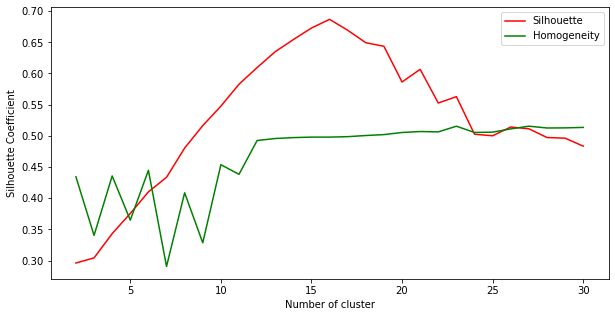

In [15]:
plt.figure()
plt.plot(list(silh.keys()), list(silh.values()), 'r', label="Silhouette")
plt.plot(list(homog.keys()), list(homog.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

### Expectation Maximization

For n_clusters=2, The Silhouette Coefficient is 0.2935694101921631
For n_clusters=2, The homogeneity_score is 0.1496523772608504
For n_clusters=2, The log_likelihood score is 10.359224716443391
For n_clusters=3, The Silhouette Coefficient is 0.2774248461751386
For n_clusters=3, The homogeneity_score is 0.14965376289837845
For n_clusters=3, The log_likelihood score is 13.039297213325671
For n_clusters=4, The Silhouette Coefficient is 0.33571566237797196
For n_clusters=4, The homogeneity_score is 0.272789018955694
For n_clusters=4, The log_likelihood score is 16.600531214485933
For n_clusters=5, The Silhouette Coefficient is 0.3410058422669218
For n_clusters=5, The homogeneity_score is 0.34126865669078443
For n_clusters=5, The log_likelihood score is 17.278152476096295
For n_clusters=6, The Silhouette Coefficient is 0.4119012763127039
For n_clusters=6, The homogeneity_score is 0.4876586913316676
For n_clusters=6, The log_likelihood score is 20.588071750161976
For n_clusters=7, The Silhou

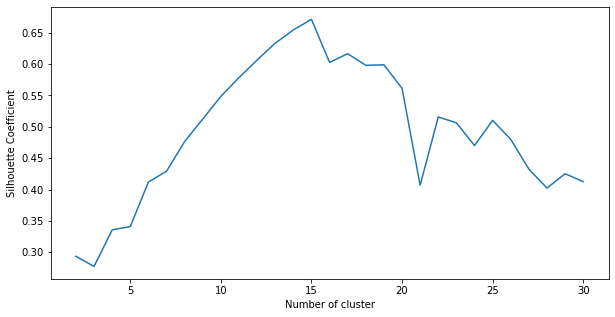

In [18]:
silh_EM = {}
homog_EM = {}
log_likelihood_EM = {}
for cluster in range(2, 31):
    gmm = GaussianMixture(n_components=cluster, max_iter=100, random_state=44, 
                          n_init=5).fit(X)
    label = gmm.predict(X)
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    homog_score = homogeneity_score(y.values.reshape(666,), label)
    silh_EM[cluster] = sil_coeff
    homog_EM[cluster] = homog_score
    log_likelihood_EM[cluster] = gmm.score(X)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(cluster, sil_coeff))
    print("For n_clusters={}, The homogeneity_score is {}".format(cluster, homog_score))
    print("For n_clusters={}, The log_likelihood score is {}".format(cluster, log_likelihood_EM[cluster]))

    
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()

Text(0, 0.5, 'Silhouette Coefficient')

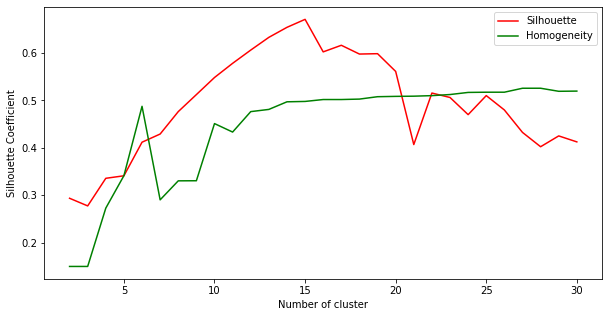

In [19]:
plt.figure()
plt.plot(list(silh_EM.keys()), list(silh_EM.values()), 'r', label="Silhouette")
plt.plot(list(homog_EM.keys()), list(homog_EM.values()), 'g', label="Homogeneity")
plt.legend()
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")

### PCA

In [18]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import cm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [19]:
X_df = pd.DataFrame(X, columns=credit.columns[:-1])

In [23]:
explained_variance_ratio=[]
rc_err=[]
for dim in range(1,10):
    pca = PCA(n_components=dim, random_state=44)
    pca.fit_transform(X_df.values)
    
    # reconstruction
    x_prime = pca.fit_transform(X_df.values)
    A = np.linalg.pinv(pca.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err.append(mean_squared_error(X_df.values, reconstructed))   
    explained_variance_ratio.append(sum(pca.explained_variance_ratio_))

df=pd.DataFrame({'dim':range(1,10),'cumulative_explained_variance_ratio':explained_variance_ratio, 'rc_err':rc_err})
df

,dim,cumulative_explained_variance_ratio,rc_err
0,1,0.350783,0.215628
1,2,0.592894,0.187541
2,3,0.791455,0.164506
3,4,0.924812,0.149036
4,5,0.960892,0.144850
5,6,0.985310,0.142017
6,7,0.994281,0.140976
7,8,0.997375,0.140618
8,9,1.000000,0.140313


In [36]:
comp = 4
pca = PCA(n_components=comp, random_state=44)
pca_result = pca.fit_transform(X_df.values)
for i in range(comp):
    field_name = "pca-"+str(i)
    X_df[field_name] = pca_result[:,i]
    credit[field_name] = pca_result[:,i]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
sum(pca.explained_variance_ratio_)
X_pca_4 = pca_result

Explained variation per principal component: [0.37174666 0.25657968 0.21042723 0.1413261 ]


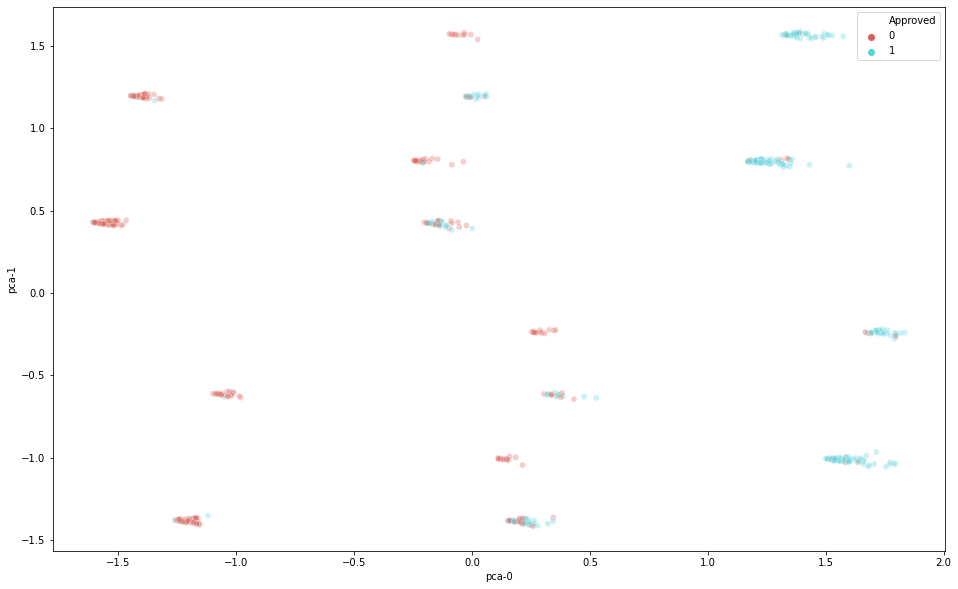

In [38]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-0", y="pca-1",
    hue="Approved",
    palette=sns.color_palette("hls", 2),
    data=credit,
    legend="full",
    alpha=0.3
)

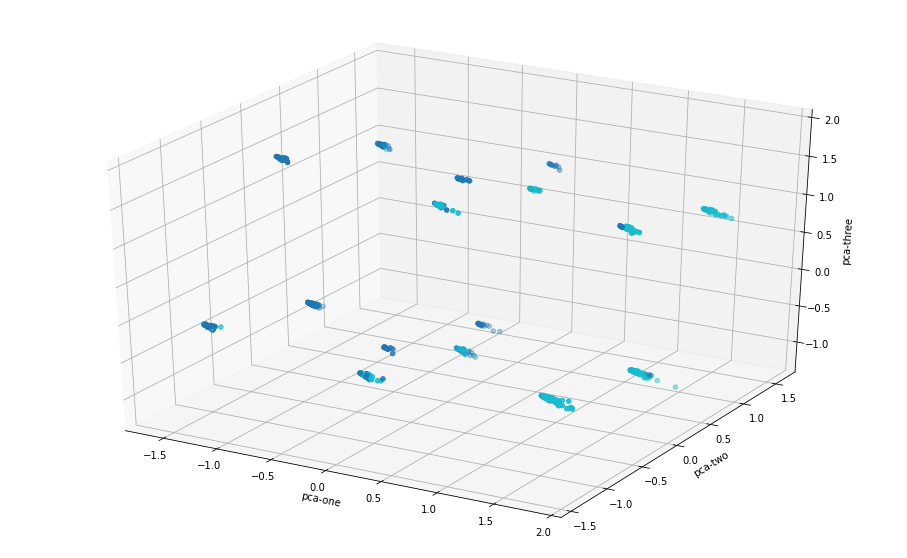

In [39]:
rndperm = np.random.permutation(credit.shape[0])
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=credit.iloc[rndperm,:]["pca-0"], 
    ys=credit.iloc[rndperm,:]["pca-1"], 
    zs=credit.iloc[rndperm,:]["pca-2"], 
    c=credit.iloc[rndperm,:]["Approved"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### KPCA

In [65]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=9, random_state=44)
kpca.fit(X_df.values)
explained_variance_ratio = kpca.lambdas_ / np.sum(kpca.lambdas_)
#print(explained_variance_ratio)
explained_variance=[]
for i in range(1,10):
    explained_variance.append( np.sum(explained_variance_ratio[:i]))
    
df=pd.DataFrame({'component':range(1,10),'explained_variance':explained_variance})
df

,component,explained_variance
0,1,0.373083
1,2,0.630680
2,3,0.841996
3,4,0.984020
4,5,0.991688
5,6,0.996878
6,7,0.998785
7,8,0.999442
8,9,1.000000


### ICA

In [40]:
credit = pd.read_csv('crx.data', names=['Male','Age','Debt','YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Income','Approved'],
                  usecols=[0,1,2,7,8,9,10,11,14,15])

credit=credit.replace('t',1)
credit=credit.replace('f',0)
credit=credit.replace('+',1)
credit=credit.replace('-',0)
credit=credit.replace('b',1)
credit=credit.replace('a',0)
credit=credit.replace('?', np.nan)

credit=credit[credit.isnull().any(axis=1)==False]

credit['Age']=credit['Age'].astype('float64')
credit['Income']=credit['Income'].astype('int64')

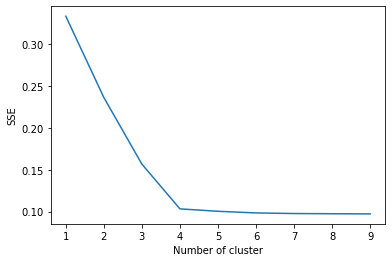

In [41]:
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
rc_errors = {}
for dim in range(1,10):
    ica = FastICA(n_components=dim, random_state=44)
    x_prime = ica.fit_transform(X_df.values)
    
    # reconstruction
    A = np.linalg.pinv(ica.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_df.values, reconstructed)    
    rc_errors[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [43]:
comp = 4
ica = FastICA(n_components=comp, random_state=44, max_iter=1000)
ica_result = ica.fit_transform(X_df.values)
for i in range(comp):
    field_name = "ica-"+str(i)
    X_df[field_name] = ica_result[:,i]
    credit[field_name] = ica_result[:,i]
X_ica_4 = ica_result
X_ica_4

array([[ 0.03762694, -0.03875358, -0.02933676, -0.02830911],
       [ 0.03589201, -0.03583928,  0.05387585, -0.03358344],
       [ 0.03625529,  0.04790871,  0.05796666, -0.04740748],
       ...,
       [-0.04531309, -0.05672638,  0.05809469,  0.05531143],
       [ 0.03432696,  0.02557198, -0.02561752,  0.03674037],
       [-0.04423911,  0.02553915, -0.0235395 ,  0.03666165]])

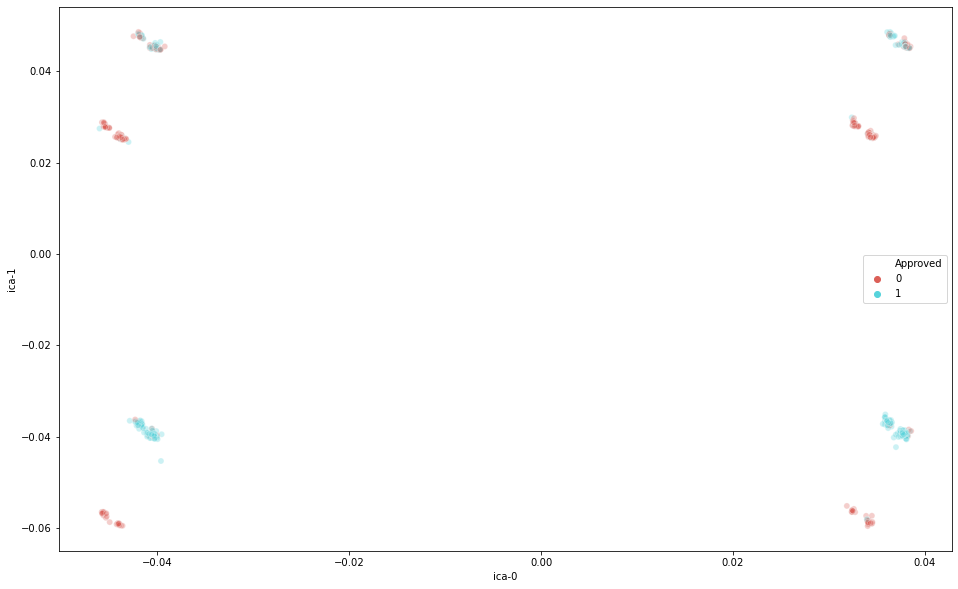

In [44]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="ica-0", y="ica-1",
    hue="Approved",
    palette=sns.color_palette("hls", 2),
    data=credit,
    legend="full",
    alpha=0.3
)

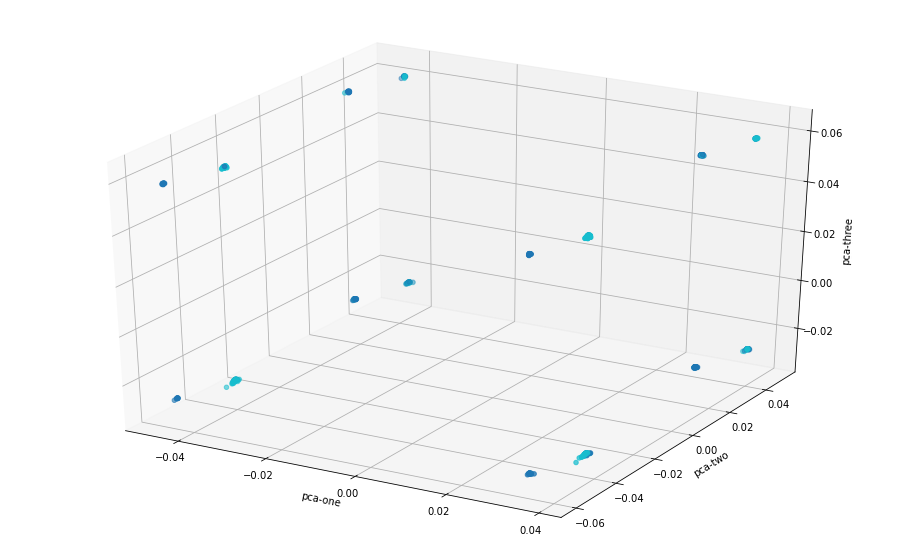

In [46]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=credit.iloc[rndperm,:]["ica-0"], 
    ys=credit.iloc[rndperm,:]["ica-1"], 
    zs=credit.iloc[rndperm,:]["ica-2"], 
    c=credit.iloc[rndperm,:]["Approved"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### Randomized Projection

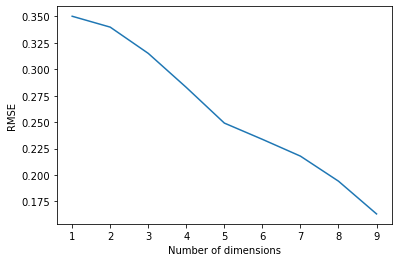

In [48]:
from sklearn.random_projection import GaussianRandomProjection
rc_errors = {}
for dim in range(1,10):
    grp = GaussianRandomProjection(n_components=dim, random_state=44)
    x_prime = grp.fit_transform(X_df.values)
    
    # reconstruction
    A = np.linalg.pinv(grp.components_.T)
    reconstructed = np.dot(x_prime, A)
    rc_err = mean_squared_error(X_df.values, reconstructed)    
    rc_errors[dim] = rc_err
#     print(dim, ": ", rc_err)
plt.figure()
plt.plot(list(rc_errors.keys()), list(rc_errors.values()))
plt.xlabel("Number of dimensions")
plt.ylabel("RMSE")
plt.show()